# Simulations With Model Violations: Periodic

Words, words, words.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp import sim, spectral, plts
from neurodsp.utils import create_times
from fooof import FOOOF

## Asymetric Oscillations in the Time Domain

In [168]:
# Simulation Settings
n_seconds = 6
fs = 500

sims = {'sim_oscillation' : {'freq' : 10, 'cycle' : 'asine', 'rdsym' : 0.3},
        'sim_powerlaw' : {'exponent' : -1.5, 'f_range' : (1, None)}}
comp_vars = [0.75, 1]

In [169]:
# Simulate the time series
sig = sim.sim_combined(n_seconds, fs, sims, comp_vars)

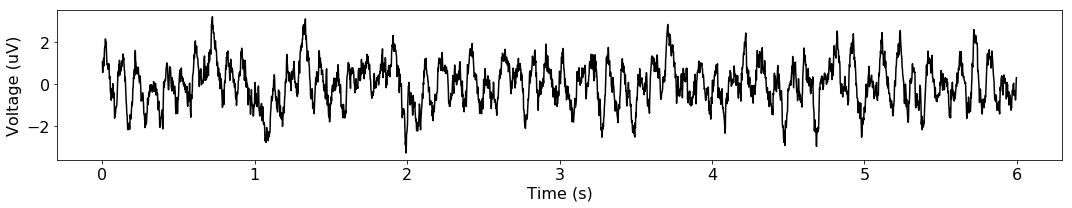

In [170]:
# 
plts.plot_time_series(create_times(n_seconds, fs), sig)

In [171]:
# Compute the power spectrum
freqs, pows = spectral.compute_spectrum(sig, fs)

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.4654, 1.5715                                          
                                                                                                  
                                       2 peaks were found:                                        
          

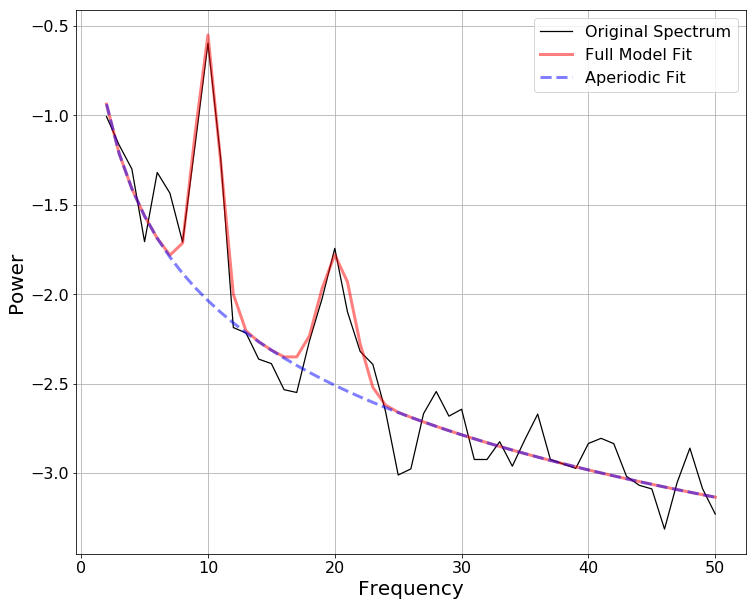

In [172]:
# Fit a FOOOF model
fm = FOOOF(verbose=False)
fm.report(freqs, pows, [2, 50])

### Notes on asymmetric oscillations

Asymmetric oscillations, in the time domain create harmonic peaks in the frequency domain.

FOOOF is able to deal with this, by capturing harmonics as peaks. Although this leads to a 'good' model fit, in terms of appropriately capturing the variance, and isolating peaks in order to measure the aperiodic, this property of harmonics exhibiting as peaks means that fit peaks in FOOOF do not necessarily reflect rhythmic activity at that frequency. 

Note that non-sinuisoidal oscillations in the time do not themselves produce asymmetric peaks in the frequency domain.

## Asymmetric Peaks in the Frequency Domain

In [178]:
from scipy import stats

In [242]:
vals = stats.skewnorm.pdf(freqs, 10, loc=10)

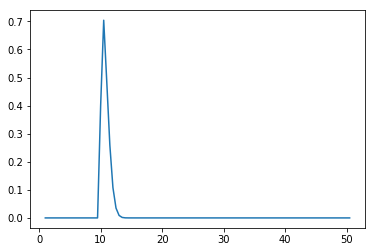

In [244]:
plt.plot(freqs, vals)

In [229]:
freqs = np.arange(1, 51, 0.5)

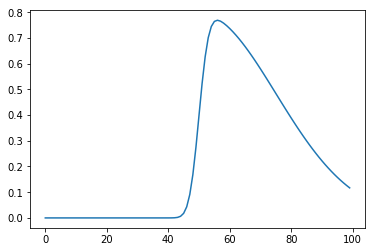

In [230]:
peaks = stats.skewnorm.pdf(np.arange(-2, 2, 1/len(freqs)*4), 10)
plt.plot(peaks)

In [231]:
from fooof.sim.gen import *

In [251]:
aperiodic_params = [1, 1]
nlv = 0.01

In [252]:
aperiodic = gen_aperiodic(freqs, aperiodic_params)

#peaks = gen_peaks(freqs, gaussian_params)
#peaks = stats.skewnorm.pdf(freqs, 10) * 10
peaks = stats.skewnorm.pdf(freqs, 10, loc=10, scale=2) * 2



noise = np.random.normal(0, nlv, len(freqs))

powers = np.power(10, aperiodic + peaks + noise)

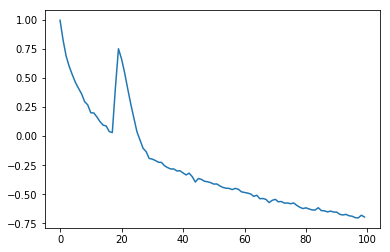

In [253]:
plt.plot(np.log10(powers))

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 51 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.0018, 0.9999                                          
                                                                                                  
                                       2 peaks were found:                                        
          

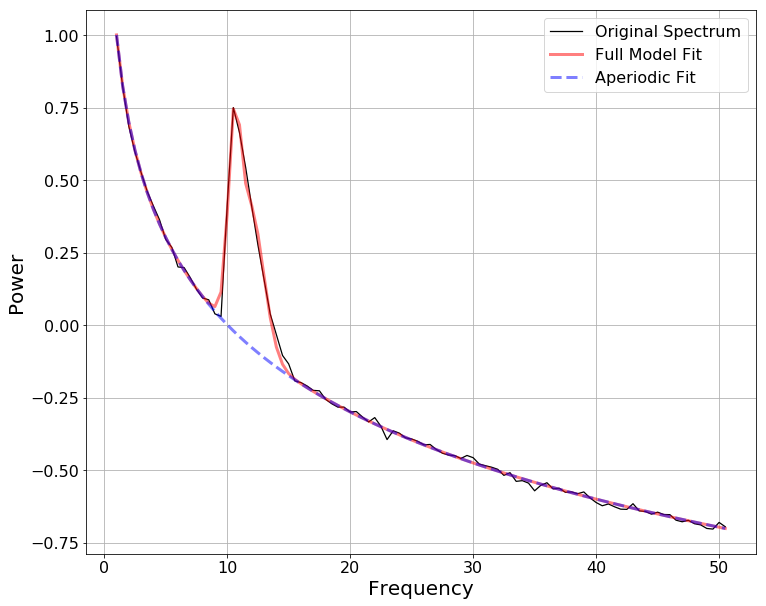

In [254]:
fm.report(freqs, powers)

### Notes on asymmetric peaks

Asymmetric peak, in the frequency domain, when fit with symmertic gaussians can be well approximated, but sometimes by fitting additional peaks. 

Note that these asymmetric peaks were simulated directly in the frequency domain. It is unclear what properties of data, in the time domain, lead to asymmetric peaks in the frequency domain. This could arise, for example, from variation in the peak frequency of the oscillation over time. 